In [1]:
from math import pi
import matplotlib.pyplot as plt
# from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now
import numpy as np

In [2]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 40
np.random.seed(seed)

In [3]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[i for i in range(num_qubits)])

    qml.RY(wires=0,phi=theta[0])
    qml.RZ(wires=0,phi=theta[1])
    qml.RY(wires=0,phi=theta[2])
    # qml.RZ(wires=0,phi=theta[3])

    # qml.RY(wires=1,phi=theta[1])
    # qml.CNOT(wires=[0,1])
    # return qml.probs(wires=[0,1])
    # return qml.probs(wires=[0])
    return qml.expval(qml.PauliZ(wires=0))

In [4]:
def encoder(x):
    # vector_x = [x,x**2,x**3,x**4]
    vector_x = [1,x]
    # vector_x = [x+x**2,1+x**3]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [5]:

def f(theta,w,x):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    # rescale_coef = abs(w[0])
    rescale_coef = w[0]
    # return (f_val[1]*(norm_x**2))*rescale_coef+w[1]
    return (f_val*(norm_x**2))*rescale_coef+w[1]
    # print(qml.draw(hepler)(encoded_x))

In [6]:

from scipy.optimize import minimize




# Differential equation parameters
ws = 376.9911
# Boundary condition 
coefii = 10

# del_0 = 0  #del
# omega_0 = 0     #w
del_0_v = 0.154918797315431
omega_0_v = 38.01928209528285

K1 = 5/coefii
K2 = 10/coefii
K3 = 1.7/coefii
ws = ws/coefii
def DE(f,f_prime,f_double_prime,t):
    delta = f
    delta_prime = f_prime
    omega = delta_prime+ws
    omega_prime = f_double_prime
    return (delta_prime+ws-omega)+omega_prime-K1+K2*np.sin(coefii*delta)+K3*(-ws+omega)*coefii
    

n_grid = 20
range_min =0.5
range_max = 1
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]
# print(dt)
print(t_data)
# del_target_values = [-0.1, -0.08568864375010266, -0.07135199292327042, -0.05703216366155178, -0.04277533332758968, -0.028630566403092566, -0.014648393492369936, -0.0008786099410683636, 0.012629993562057113, 0.025830965225360485, 0.03868190003112095, 0.05114514907683676, 0.06318818053413534, 0.07478349631699908, 0.08590929364185632, 0.09655108128205876, 0.10669910851327256, 0.11634802541217151, 0.12549688285643618, 0.13414913252475494, 0.1423124546002818, 0.14999727816970396, 0.1572170147933966, 0.16398646160587024, 0.17032150117763253, 0.17623910151518826, 0.18175731606103976, 0.18689528211221512, 0.19167252338163385, 0.1961073022258, 0.2002172705183872, 0.2040196495808423, 0.20753123018238517, 0.21076837254000894, 0.21374700631847987, 0.2164826306303374, 0.21899031403589397, 0.22128469454323552, 0.2233792634241711, 0.22528520015009165, 0.22701309424038968, 0.22857304585789437, 0.22997466468065175, 0.2312270699019247, 0.23233889023019288, 0.23331826388915283, 0.23417283861771784, 0.2349097716700181, 0.2355355471757422, 0.23605508170803655]
# omega_target_values = [38.39911, 38.40131255162024, 38.401559501400065, 38.399627615014815, 38.39535272010845, 38.38863569037213, 38.37944575798523, 38.36781828175373, 38.35385457506316, 38.33771250498817, 38.31960064799821, 38.29975795463622, 38.27844654658136, 38.25594953663366, 38.232548774138536, 38.20852344187769, 38.184133101993716, 38.15961422638989, 38.135180196730154, 38.11102130443908, 38.0873045267779, 38.0641648590319, 38.04170495996719, 38.020008128295665, 37.999139183467754, 37.979144465672405, 37.96005183583712, 37.94187079269068, 37.92460193204962, 37.90823330461032, 37.892744190413474, 37.87811073974539, 37.864305973137945, 37.851299781368624, 37.83905892546051, 37.82754703668229, 37.816724616548235, 37.80654903681822, 37.7969789305147, 37.78797953688034, 37.779515522995986, 37.77155243468513, 37.76405670589686, 37.75699565870589, 37.75033750331248, 37.744051338042496, 37.73810714934741, 37.73247581180426, 37.72712975291509, 37.7220465421391]


def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    global theta
    global w
    # Reshape the flattened theta back to its original shape
    theta_shape = theta.shape
    w_shape = w.shape
    w, theta_flat = params[:3], params[3:]
    theta = theta_flat.reshape(theta_shape)


    u = np.zeros(n_grid + 2)
    u[0] = f(theta,w, range_min - dt)
    u[1] = del_0_v
    for i in range(1, n_grid):
        u[i + 1] = f(theta,w, t_data[i])
    u[n_grid + 1]=f(theta,w, range_max + dt)
  
    u_prime = (u[2:] - u[:-2])/(2*dt)
    omega_0 = u_prime[0]+ws
    u_double_prime = (u_prime[2:] - u_prime[:-2])/(2*dt)
    loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    
    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)
    loss_b = 0
    loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = loss_i+loss_b
    # loss = loss_i
    # print("Current loss:", loss) 
    return loss



[0.5        0.52631579 0.55263158 0.57894737 0.60526316 0.63157895
 0.65789474 0.68421053 0.71052632 0.73684211 0.76315789 0.78947368
 0.81578947 0.84210526 0.86842105 0.89473684 0.92105263 0.94736842
 0.97368421 1.        ]


In [7]:
# Initialize w and theta with random values
np.random.seed(20)  # Set a seed for reproducibility
# w = np.random.rand(3, 3)*0
# theta = np.random.rand(3, 4, 2)

w = np.zeros(3)
theta = np.random.uniform(0, 2 * np.pi, size=(3,1))


# Create initial_params as a list
initial_params = [w, theta]

# Flatten initial_params into a 1D array
initial_params_flat = np.concatenate([initial_params[0].flatten(), initial_params[1].flatten()])

# Call minimize with the wrapper function
result = minimize(loss, initial_params_flat, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

# Extract the optimized values of w and theta from the result
optimized_params_flat = result.x
w = np.reshape(optimized_params_flat[:w.size], w.shape)
theta = np.reshape(optimized_params_flat[w.size:], theta.shape)


Current loss: 27.216747149017248
Current loss: 17.72851943474403
Current loss: 15.119514007279173
Current loss: 14.948138047899679
Current loss: 13.684496279494144
Current loss: 13.652273758614532
Current loss: 9.630203732491392
Current loss: 9.623347163582256
Current loss: 9.386203991845969
Current loss: 9.150757527542869
Current loss: 8.996249032727683
Current loss: 8.906808081324078
Current loss: 7.537928604458892
Current loss: 7.405508028387483
Current loss: 6.181803228092193
Current loss: 5.8091208743519305
Current loss: 5.096144208483456
Current loss: 3.7537605938501493
Current loss: 1.873624174943053
Current loss: 1.7146806015988256
Current loss: 1.4403223404626975
Current loss: 1.0269107246206501
Current loss: 0.8618976414408547
Current loss: 0.8553051719486604
Current loss: 0.8534870326613716
Current loss: 0.8530166259811627
Current loss: 0.8529936718751576


In [9]:
print(w)
print(theta)

[-0.65703064 -0.36010314  0.        ]
[[4.07346198]
 [5.39624308]
 [4.62576612]]


In [10]:
# num_layers=4
# # theta=np.random.uniform(0,2*pi,size=(num_layers,num_qubits),requires_grad=True)
# theta=np.random.uniform(0,2*pi,size=(num_layers,num_qubits))
# # w=np.zeros(3,requires_grad=True)
# w=np.zeros(3)


# initial_params = [w,theta]
# # initial_params = [4, 4, 4,4]
# # initial_params = [10, 20, 8,70]
# # initial_params = [1.5703050481447, 6.664583545312459, 8.490607793546264,-1.0593486531798044]
# # initial_params = [0.17749722218115743, -0.6981313539613472, 0.8622182932697816,-0.1070692270857497]

# # result = minimize(loss, initial_params, method='Nelder-Mead')
# result = minimize(cost, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

# theta,w = result.x

In [14]:
del_target_values =[0.17333137835043602, 0.18062784420858655, 0.18728530204320193, 0.19334528645888516, 0.19884670118672254, 0.20382691923600568, 0.20832212326301902, 0.21236730557103997, 0.21599626811033862, 0.21924162247817827, 0.22213472885702723, 0.22470305194862733, 0.22696981816837503, 0.22895686278118446, 0.23068466500269122, 0.23217234799925227, 0.23343767888794603, 0.23449706873657233, 0.2353655394875444, 0.23605508170803655]
omega_target_values = [37.98903037177535, 37.963995628833146, 37.940474302322194, 37.91846768066383, 37.897945540119366, 37.878860012310916, 37.86115457599033, 37.84476405703916, 37.82961462846871, 37.81562381042001, 37.80270089448699, 37.7907619549445, 37.77973169343871, 37.769535912342384, 37.76010286943996, 37.75136327792759, 37.74325030641307, 37.735699578915884, 37.72864929354001, 37.7220465421391]


20
20
[0.15569136 0.16302209 0.16993998 0.17644503 0.18253724 0.18821661
 0.19348314 0.19833683 0.20277768 0.20680569 0.21042085 0.21362318
 0.21641266 0.21878931 0.22075311 0.22230408 0.2234422  0.22416748
 0.22447992 0.22437953]


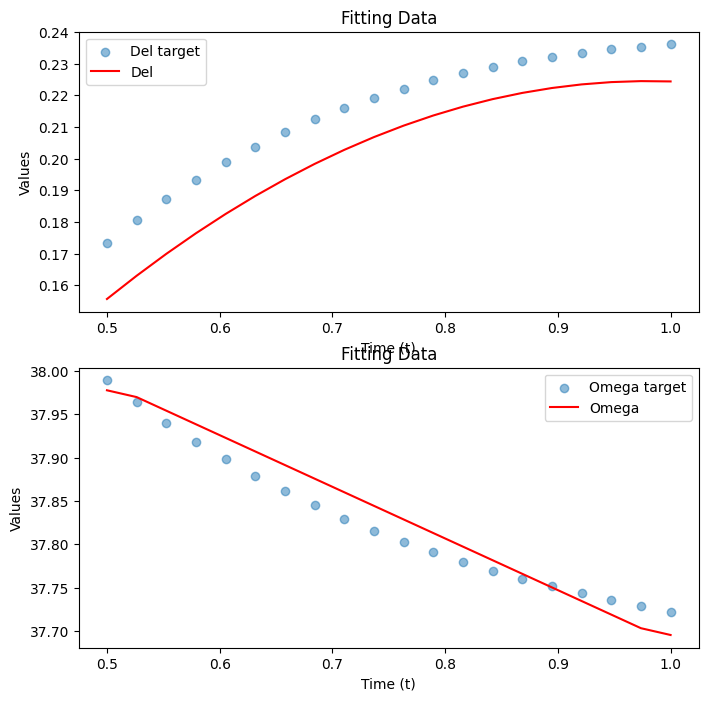

20
20
0.22437952598013866
37.69529485348709
[0.15569136 0.16302209 0.16993998 0.17644503 0.18253724 0.18821661
 0.19348314 0.19833683 0.20277768 0.20680569 0.21042085 0.21362318
 0.21641266 0.21878931 0.22075311 0.22230408 0.2234422  0.22416748
 0.22447992 0.22437953]
[37.9776778  37.96983383 37.95414589 37.93845795 37.92277001 37.90708207
 37.89139413 37.87570618 37.86001824 37.8443303  37.82864236 37.81295442
 37.79726647 37.78157853 37.76589059 37.75020265 37.73451471 37.71882677
 37.70313882 37.69529485]


In [15]:
import matplotlib.pyplot as plt

# Plot the target values and the fitted curve
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del_target_values, label='Del target', alpha=0.5)
print('===================')
delta_pred = np.array([f(theta,w,t_i)[0] for t_i in t_data])
print(len(delta_pred))
print(len(t_data))
plt.plot(t_data, delta_pred, 'r', label='Del')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

print(delta_pred)
# Plot the target values and the fitted curve
# plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega_target_values, label='Omega target', alpha=0.5)

del_prime = np.gradient(delta_pred, t_data)
omega_pred = del_prime+ws

plt.plot(t_data, omega_pred, 'r', label='Omega')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.show()

# plt.show()
print(len(delta_pred))
print(len(omega_pred))
print(delta_pred[-1])
print(omega_pred[-1])

print(delta_pred)
print(omega_pred)


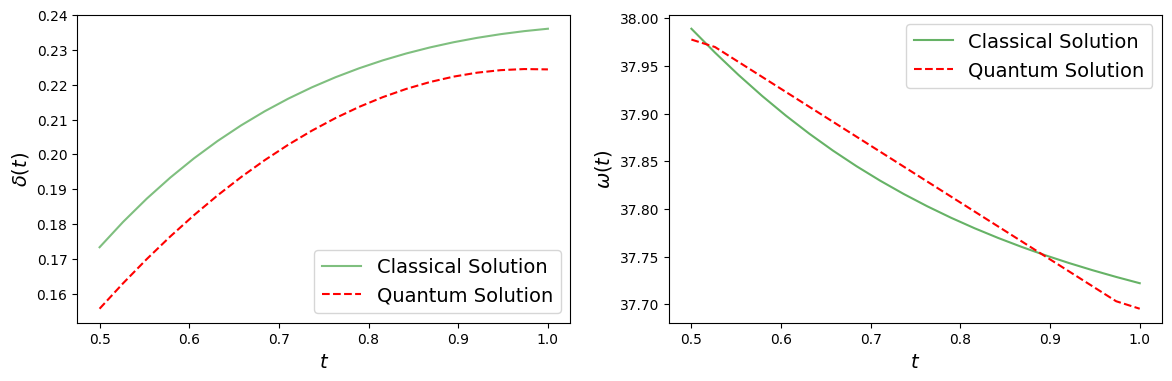

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Set a larger font size
font_size = 14

# Plot the delta and omega values side by side with padding
fig, axs = plt.subplots(1, 2, figsize=(14, 4))  # 1 row, 2 columns

# Plotting Precise and Quantum Solution for delta(t)
axs[0].plot(t_data, del_target_values,color='green', label='Classical Solution', alpha=0.5)
delta_pred = np.array([f(theta,w,t_i)[0] for t_i in t_data])
axs[0].plot(t_data, delta_pred, 'r--', label='Quantum Solution')

axs[0].set_xlabel('$t$', fontsize=font_size)  # Set font size for x-axis label
axs[0].set_ylabel('$\delta(t)$', fontsize=font_size)  # Set font size for y-axis label
axs[0].legend(fontsize=font_size)  # Set font size for legend
# axs[0].set_title('Comparison of Precise and Quantum Solution for $\\delta(t)$', fontsize=font_size)  # Set font size for title

# Plotting Precise and Quantum Solution for omega(t)
axs[1].plot(t_data, omega_target_values,color='green', label='Classical Solution', alpha=0.6)

# Calculating omega_pred using the gradient of delta_pred and ws
del_prime = np.gradient(delta_pred, t_data)
omega_pred = del_prime + ws

axs[1].plot(t_data, omega_pred, 'r--', label='Quantum Solution')

axs[1].set_xlabel('$t$', fontsize=font_size)  # Set font size for x-axis label
axs[1].set_ylabel('$\omega(t)$', fontsize=font_size)  # Set font size for y-axis label
axs[1].legend(fontsize=font_size)  # Set font size for legend
# axs[1].set_title('Comparison of Precise and Quantum Solution for $\\omega(t)$', fontsize=font_size)  # Set font size for title

# Adjust layout for better spacing with added padding
plt.subplots_adjust(wspace=0.2)  # Set the desired width space between subplots

plt.show()
